In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from scipy.special import softmax 
from tqdm import tqdm


In [2]:
# path = "F:/git/eeg_prep/processed_files/039_000500_000500.hdf5"
path = "/media/dan/Data/git/eeg_prep/processed_files/106_000500_000500.hdf5"
with h5py.File(path, "r") as f:
    A_mats_500 = f['data']['A_mats'][:]
    A_mats_500_mask = f['data']['A_mask'][:]
    soz = f['metadata']["patient_info"]['soz'][:].astype(bool)
    chnames = f['metadata']['channels'][:]
    # bytestring to string
    chnames = [name.decode('utf-8') for name in chnames]
    chnames = np.array(chnames)


In [3]:
A = np.abs(A_mats_500[:,:,A_mats_500_mask==1])
# 0 diagonals of first two dimentions along the third
eye = np.eye(A.shape[0]) == 1
# A[eye,:] = np.nan
# A[eye,:] = -np.inf

In [4]:
tick_positions = [idx for idx, value in enumerate(soz) if value]
print(tick_positions)
print(chnames[tick_positions])

[29, 30, 48, 49, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
["A'2" "A'3" "C'1" "C'2" "I'1" "I'2" "I'3" "I'4" "I'5" "I'6" "I'7" "I'8"
 "I'9" "I'10"]


In [5]:
A[eye,:] = -np.inf

sm = softmax(A, axis=1)
sm.shape
A[eye,:] = np.nan

In [6]:
samples = A[0,:,0]
# samples = samples / np.nanmax(samples, axis=0)
# plt.plot(samples)

In [7]:
samples = sm[0,1:,0]
samples = samples / np.nanmax(samples, axis=0)
# plt.plot(samples)

In [8]:
# # delete existing files
# files = os.listdir("F:/git/network_miner/temp/tmp/")
# for file in files:
#     os.remove(f"F:/git/network_miner/temp/tmp/{file}")
# for i in range(sm.shape[0]):
#     samples = A[i,:,:]
#     samples = samples / np.nanmax(samples, axis=0)
#     plt.figure(figsize=(20, 10))
#     ax = sns.heatmap(samples, cmap='nipy_spectral')
#     # Remove all ticks
#     # ax.set_xticks([])
#     ax.set_yticks([])

#     # ax.set_xticks(tick_positions)
#     ax.set_yticks(tick_positions)

#     # Remove tick labels
#     # ax.set_xticklabels([])
#     ax.set_yticklabels([]);
    
#     # set axis labels
#     ax.set_xlabel('Window index')
#     ax.set_ylabel('Electrode (tick marks indicate SOZ)')
#     plt.title(f"row of A matrix at channel {i}")
#     plt.savefig(f"F:/git/network_miner/temp/tmp/raw_{i}.png")

#     plt.close()


In [9]:
maxsm = np.nanmax(sm)
maxsm

np.float64(0.013920555930417328)

In [10]:
def normalize_zero_one(data):
    """
    Normalize data to range [0,1] using min-max normalization
    
    Args:
        data: numpy array or list of numbers
        
    Returns:
        normalized array of same shape as input
    """
    data = np.array(data)
    min_val = np.nanmin(data)
    max_val = np.nanmax(data)
    
    # Avoid division by zero if all values are the same
    if max_val == min_val:
        return np.zeros_like(data)
        
    return (data - min_val) / (max_val - min_val)

In [11]:
# files = os.listdir("F:/git/network_miner/temp/boxplots/")
# for file in files:
#     os.remove(f"F:/git/network_miner/temp/boxplots/{file}")
# # To create for all rows, you can loop:
# for i in tqdm(range(sm.shape[0])):
#     plt.figure(figsize=(20, 10))
#     data_to_plot = [normalize_zero_one(sm[i,j,:]) for j in range(sm.shape[1])]
#     plt.boxplot(data_to_plot)
    
#     plt.title(f"Distribution of softmax values for row {i} across time")
#     plt.xlabel("Column index")
#     plt.ylabel("Softmax value")
#     plt.grid(True, alpha=0.3)
    
#     # Highlight SOZ columns
#     for tick_pos in tick_positions:
#         plt.axvline(x=tick_pos, color='r', alpha=0.2)
    
#     plt.savefig(f"F:/git/network_miner/temp/boxplots/boxplot_{i}.png")
#     plt.close()
#     # break

In [12]:
# # delete existing files
# files = os.listdir("F:/git/network_miner/temp/softmax/")
# for file in files:
#     os.remove(f"F:/git/network_miner/temp/softmax/{file}")
# for i in tqdm(range(sm.shape[0])):
#     samples = sm[i,:,:]
#     samples = samples / np.nanmax(samples, axis=0)
#     plt.figure(figsize=(20, 10))
#     ax = sns.heatmap(samples, cmap='nipy_spectral',vmin=0, vmax=1)
#     # Remove all ticks
#     # ax.set_xticks([])
#     ax.set_yticks([])

#     # ax.set_xticks(tick_positions)
#     ax.set_yticks(tick_positions)

#     # Remove tick labels
#     # ax.set_xticklabels([])
#     ax.set_yticklabels([]);
    
#     # set axis labels
#     ax.set_xlabel('Window index')
#     ax.set_ylabel('Electrode (tick marks indicate SOZ)')
#     plt.title(f"row softmax of A matrix at channel {i}|{chnames[i]}")
#     plt.savefig(f"F:/git/network_miner/temp/softmax/softmax_{i}.png")

#     plt.close()


In [13]:
# # combine 2 images into one
# # combine raw and softmax images into one figure with two rows
# for i in range(sm.shape[0]):
#     plt.figure(figsize=(20, 20))
    
#     # First row - raw data
#     plt.subplot(2, 1, 1)
#     samples = A[i,:,:]
#     samples = samples / np.nanmax(samples, axis=0)
#     ax1 = sns.heatmap(samples, cmap='nipy_spectral')
#     ax1.set_yticks(tick_positions)
#     ax1.set_yticklabels([])
#     ax1.set_xlabel('Window index')
#     ax1.set_ylabel('Electrode (tick marks indicate SOZ)')
#     ax1.set_title(f"Raw A matrix at channel {i}")
    
#     # Second row - softmax
#     plt.subplot(2, 1, 2)
#     samples = sm[i,:,:]
#     samples = samples / np.nanmax(samples, axis=0)
#     ax2 = sns.heatmap(samples, cmap='nipy_spectral')
#     ax2.set_yticks(tick_positions)
#     ax2.set_yticklabels([])
#     ax2.set_xlabel('Window index')
#     ax2.set_ylabel('Electrode (tick marks indicate SOZ)')
#     ax2.set_title(f"Softmax of A matrix at channel {i}")
    
#     plt.tight_layout()
#     plt.savefig(f"F:/git/network_miner/temp/tmp/combined_{i}.png")
#     plt.close()


In [14]:
A = A_mats_500[:,:,A_mats_500_mask==1]
A = np.abs(A)
A[eye,:] = np.nan
# normalize 0-1 for each row so each row at each time point is 0-1 
for time in range(A.shape[-1]):
    # Get the 2D matrix at the specific time step
    slice_t = A[:, :, time]
    
    # Normalize each row individually
    row_min = np.nanmin(slice_t, axis=1, keepdims=True)
    row_max = np.nanmax(slice_t, axis=1, keepdims=True)
    
    # Avoid division by zero in case of zero-variance rows
    normalized_slice = (slice_t - row_min) / (row_max - row_min + 1e-10)
    
    # Place the normalized slice back into A
    A[:, :, time] = normalized_slice
A.shape

(168, 168, 601)

In [15]:
soz_soz = []
soz_noz = []
noz_noz = []

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if soz[i] == 1 and soz[j] == 1:
            soz_soz.append(A[i,j,:])
        elif soz[i] == 0 and soz[j] == 0:
            noz_noz.append(A[i,j,:])
        else:
            soz_noz.append(A[i,j,:])

In [34]:
data = []
y = []
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if soz[i] == 1 and soz[j] == 1:
            y.append(1)
        else:
            y.append(0)
        for t in range(A.shape[-1]):
            # set nan to 0
            if np.isnan(A[i, j, t]):
                A[i, j, t] = 0
            data.append([i * A.shape[0] + j, t, A[i, j, t]])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['id', 'time', 'value'])
y = np.array(y)

In [35]:
df.shape

(16962624, 3)

In [36]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_features, extract_relevant_features, select_features
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix


In [37]:
extracted_features = extract_features(df, column_id="id", column_sort="time",n_jobs=30)

Feature Extraction: 100%|██████████| 150/150 [06:27<00:00,  2.58s/it]


In [38]:
extracted_features_imp = impute(extracted_features)

/home/dan/miniconda3/envs/sourcesink/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


In [39]:
X_full_train, X_full_test, y_train, y_test = train_test_split(extracted_features_imp, y, test_size=.4, random_state=42)

In [40]:
X_filtered_train = select_features(X_full_train, y_train)
X_filtered_train, X_filtered_test = X_full_train[X_filtered_train.columns], X_full_test[X_filtered_train.columns]


In [54]:

# Option 1: Using class weights
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Create classifier with weights
# classifier_filtered = DecisionTreeClassifier(class_weight=class_weight_dict)
# classifier_filtered = DecisionTreeClassifier()
# classifier_filtered.fit(X_filtered_train, y_train)

# random forest
from sklearn.ensemble import RandomForestClassifier
classifier_filtered = RandomForestClassifier(class_weight=class_weight_dict)
classifier_filtered.fit(X_filtered_train, y_train)


RandomForestClassifier(class_weight={np.int64(0): np.float64(0.503568454859046),
                                     np.int64(1): np.float64(70.55833333333334)})

In [55]:
print(classification_report(y_test, classifier_filtered.predict(X_filtered_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11214
           1       0.08      0.07      0.07        76

    accuracy                           0.99     11290
   macro avg       0.53      0.53      0.53     11290
weighted avg       0.99      0.99      0.99     11290



In [56]:
tn, fp, fn, tp = confusion_matrix(y_test, classifier_filtered.predict(X_filtered_test)).ravel()

# print nicely confusion matrix
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")


True Negatives: 11153
False Positives: 61
False Negatives: 71
True Positives: 5


In [53]:
sum(soz)

np.int64(14)

In [44]:
# plt.figure(figsize=(20,20),dpi=600)
# plot_tree(classifier_filtered, feature_names=X_filtered_train.columns, class_names=["NOZ", "SOZ"], filled=True);

In [45]:
fet = select_features(extracted_features_imp, y)

In [46]:
fet

,"value__agg_linear_trend__attr_""stderr""__chunk_len_50__f_agg_""var""",value__ar_coefficient__coeff_0__k_10,"value__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""var""","value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.4","value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.2","value__linear_trend__attr_""stderr""","value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4","value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.0",...,"value__fft_coefficient__attr_""angle""__coeff_78",value__index_mass_quantile__q_0.1,"value__agg_autocorrelation__f_agg_""median""__maxlag_40",value__symmetry_looking__r_0.05,"value__fft_coefficient__attr_""imag""__coeff_2","value__fft_coefficient__attr_""angle""__coeff_1",value__large_standard_deviation__r_0.25,"value__fft_coefficient__attr_""angle""__coeff_29","value__fft_coefficient__attr_""real""__coeff_99","value__fft_coefficient__attr_""real""__coeff_10"
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.101498,0.000000,0.0,0.000000,0.000000,0.0,180.000000,0.000000,0.000000
1,0.000051,0.053605,0.000003,0.000962,0.003032,0.001234,0.000010,0.042411,0.002217,0.001372,...,-55.568971,0.106489,0.005300,1.0,-0.182580,-64.723024,0.0,-35.353329,0.660813,0.406162
2,0.000473,0.165435,0.000028,0.009541,0.031105,0.013099,0.000031,0.134263,0.023898,0.014614,...,25.885667,0.099834,-0.013265,1.0,1.198388,-13.870113,0.0,-166.033682,-0.497744,2.930120
3,0.000630,0.239885,0.000045,0.018453,0.046680,0.019246,0.000039,0.165867,0.043939,0.023032,...,-169.790279,0.098170,-0.004942,1.0,0.577492,-66.532529,0.0,-35.764526,-2.015116,0.737233
4,0.001075,0.260791,0.000069,0.023169,0.069105,0.026242,0.000049,0.207044,0.059337,0.033140,...,13.681462,0.093178,-0.001269,1.0,0.624304,-1.689320,0.0,17.281435,1.250048,4.529534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28219,0.001401,0.320555,0.000090,0.038091,0.112551,0.046133,0.000057,0.257718,0.090358,0.046526,...,57.603763,0.099834,-0.010932,0.0,1.199202,68.705967,0.0,64.062601,8.021049,-0.948265
28220,0.001235,0.301444,0.000088,0.028792,0.088247,0.035019,0.000053,0.230717,0.070473,0.039945,...,-90.797492,0.113145,-0.004939,1.0,-0.387219,167.510370,0.0,59.028225,3.295726,-0.931373
28221,0.001458,0.297228,0.000083,0.030119,0.097519,0.039498,0.000056,0.241043,0.079903,0.043470,...,-99.927166,0.101498,-0.003518,0.0,-0.176834,75.393756,0.0,98.027496,-3.047346,0.472261
28222,0.001807,0.414711,0.000108,0.031643,0.122586,0.045908,0.000069,0.276929,0.086828,0.062275,...,67.784408,0.096506,-0.004553,0.0,5.024147,-69.669786,1.0,-37.745266,2.855671,1.835520


In [47]:
fet_0 = fet[y == 0]
fet_1 = fet[y == 1]

In [48]:
# feature_dir = "/media/dan/Data/git/network_miner/temp/features"
# files = os.listdir(feature_dir)
# for file in files:
#     os.remove(os.path.join(feature_dir, file))

# for i,col in enumerate(fet.columns):
#     plt.figure(figsize=(10,5))
#     sns.ecdfplot(fet[col], label="All")
#     sns.ecdfplot(fet_0[col], label="NOZ")
#     sns.ecdfplot(fet_1[col], label="SOZ")
#     plt.legend()
#     plt.title(f"ECDF of {col}")
#     plt.savefig(os.path.join("/media/dan/Data/git/network_miner/temp/features",f"ecdf_{i}.png"))
#     plt.close()

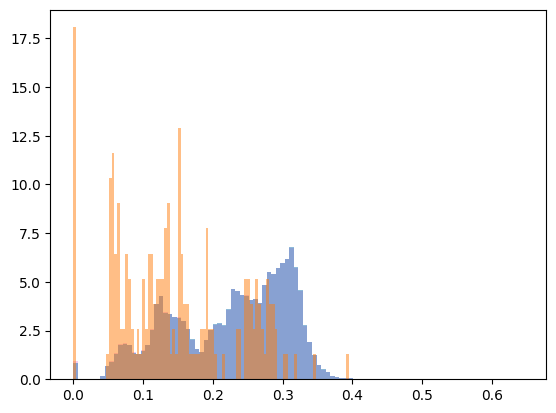

In [49]:
plt.hist(fet[fet.columns[42]], bins=100, alpha=0.2, label='All', density=True, color='m');
plt.hist(fet_0[fet_0.columns[42]], bins=100, alpha=0.5, label='0', density=True)
plt.hist(fet_1[fet_1.columns[42]], bins=100, alpha=0.5, label='1', density=True);
